## codon_lm_model和utr_cds_lm_model总结

### 1.codon_lm_model

#### 1.1 已完成任务

1. 复现codonBert paper相关代码和结果，按论文中将数据拆分70%训练集、15%验证集、15%测试集，在测试集上得出Spearman分数为0.89，和论文中结果匹配。
2. 在狂犬数据集上，基于codonBert模型微调训练回归模型，数据按照70%、15%、15%拆分，在测试集上得出的Spearman分数为0.71，Pearson分数为0.66。

#### 1.2 分析和总结

1. 在完成codonBert论文复现和在狂犬数据模型微调测试下来，可以看出codonBert算法模型是非常典型的Bert模型。
2. 在CDS翻译区，按密码子训练Bert模型并在下游任务中微调测试得出的结果比TF-IDF+随机森林和TextCNN等传统方法效果好。

#### 1.3 下一步工作

1. 可以尝试使用GPT、T5、GLM算法模型在CDS数据上进行训练测试，和Bert模型进行对比。
2. codon只使用了CDS翻译区的数据，可以将UTR数据考虑进来训练。
3. 目前的训练都是使用的核苷酸的数据，我们是否可以加入些中文或英文文字的数据参与训练。

#### 1.4 可能存在的问题

1. 基于codonBert预训练模型复现和训练之所以顺利，是因为原作者开源了预训练模型。如果我们自己从0开始训练模型的话，存在几个问题，一个是数据集，一个是显卡的计算资源，其次还有大模型训练一些技巧性和经验性的问题，参数的调试等等。生成大模型的训练需要更多的数据和计算资源。
2. 业界大模型的训练一般都是基于大公司开源出的预训练模型进行finetune，而我们这个领域开源的大模型很少。

### 2. utr_cds_lm_model

#### 2.1 已完成任务

1. 研究了相关UTR的paper和开源代码。 
2. 处理和分析M6A position数据集，各种尝试不同数据集对的关系。
3. 分别在5‘utr、cds、3’utr数据集上初步训练bert模型和测试。

#### 2.2 分析和总结

In [1]:
from IPython.display import Image

1. Control1_Methy_level、TE shGFP、Transcript_sequence、TE shMETTL3，下文用（column1、column2、column3、column4）替代。在不同区域5‘UTR、CDS、3'UTR分别计算和绘制(column1-column3)/column1、(column2-column4)/column2的Person相关系数，其中5’UTR分数为-0.32，另外两个区域Person相关系数不大。如下图：

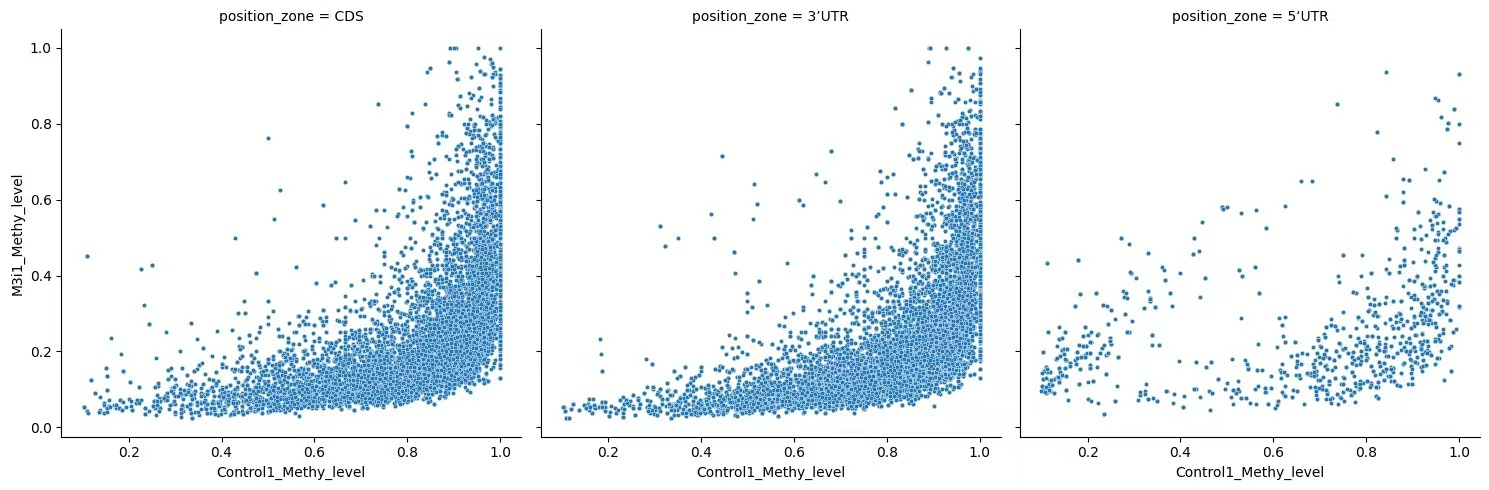

In [6]:
Image('./images/21708499174_.pic.jpg', width=800)

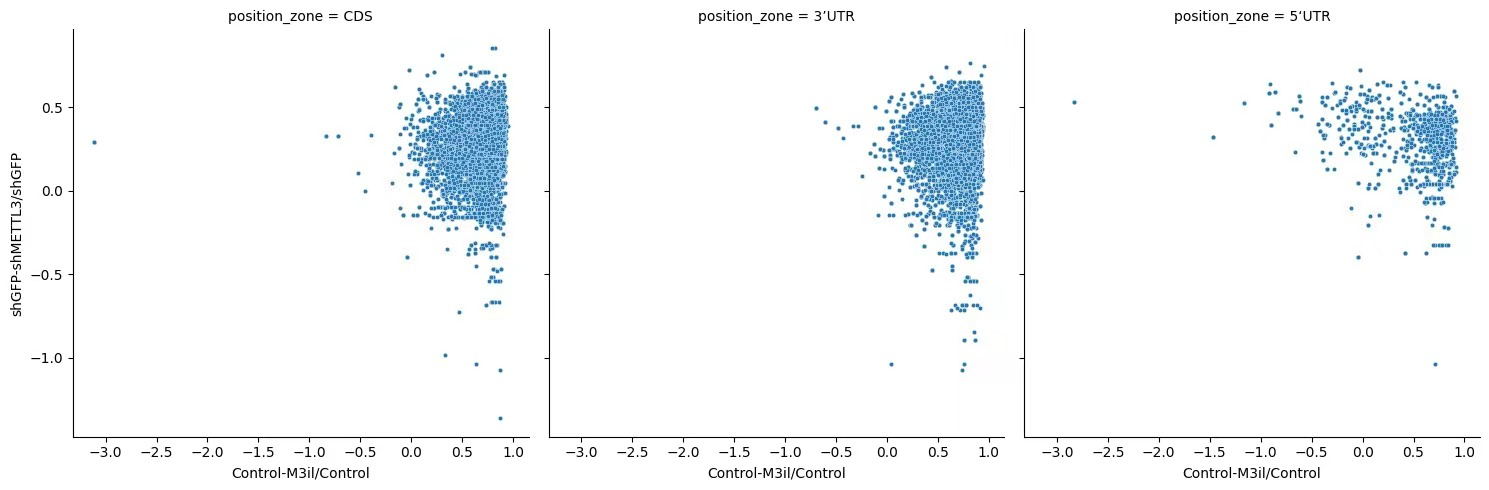

In [7]:
Image('./images/31708499179_.pic.jpg', width=800)

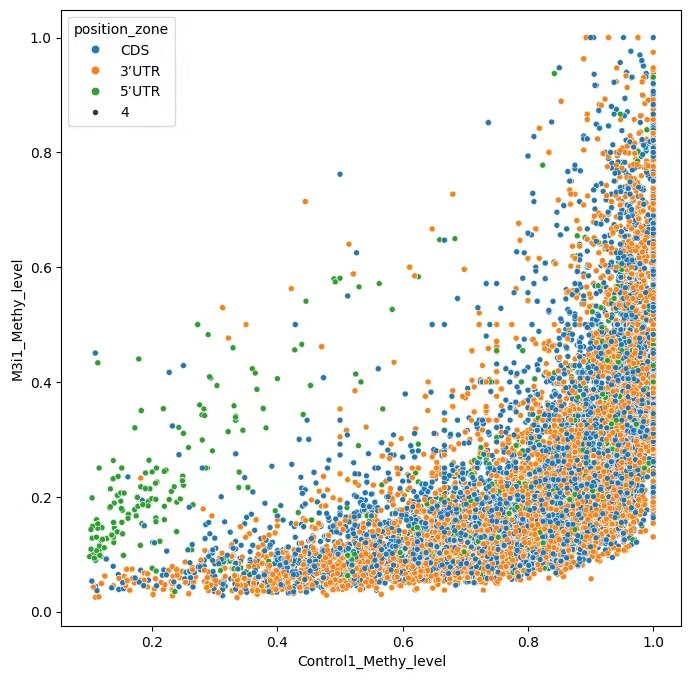

In [9]:
Image('./images/41708499182_.pic.jpg', width=400)

2. 将M6A position位置替换为6，取对应position前后最多1024长度的序列进行训练，label为column3或column4，训练bert的的回归模型，数据集按照0.7、0.15、0.15拆分。然后不同的区域计算出的Spearman系数分别是：0.48、0.29、0.03

#### 2.3 下一步工作

1. 优化和对比测试模型结构，如何将column1和column3的分数和sequence结合起来训练。
2. 分析和绘出不同序列位置注意力分数。
3. 尝试采取Smart5UTR的模型结构，将自回编码模型和回归模型结合起来训练。

#### 2.4 可能存在的问题

1. M6A的数据，存在很多同一个序列对应一个label的数据，由于数据采集技术问题，但是这在训练模型时候会造成很大的干扰。